In [13]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import datetime
from pdb import set_trace
%matplotlib notebook
from gmplot import gmplot
import numpy as np
from matplotlib import style

In [14]:
style.use("Solarize_Light2")

In [15]:
df = pd.read_csv(r'c:\Users\15764\Documents\Datasets\Weather\ghcnd-stations.csv',header=None, index_col=0,names=['ID','LATITUDE', 'LONGITUDE', 'ELEVATION','STATE','NAME' , 'GSN FLAG' , 'HCN/CRN FLAG' ,'WMO ID'])

In [16]:
df.head()

,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
ID,,,,,,,,
ACW00011604,17.1167,-61.7833,10.1,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,ST JOHNS,NaN,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,SHARJAH INTER. AIRP GSN,41196.0,NaN,NaN,NaN
AEM00041194,25.2550,55.3640,10.4,DUBAI INTL,41194.0,NaN,NaN,NaN
AEM00041217,24.4330,54.6510,26.8,ABU DHABI INTL,41217.0,NaN,NaN,NaN


In [ ]:

lons = df['LONGITUDE'].sample(n=100).tolist()
lats = df['LATITUDE'].sample(n=100).tolist()


<IPython.core.display.Javascript object>


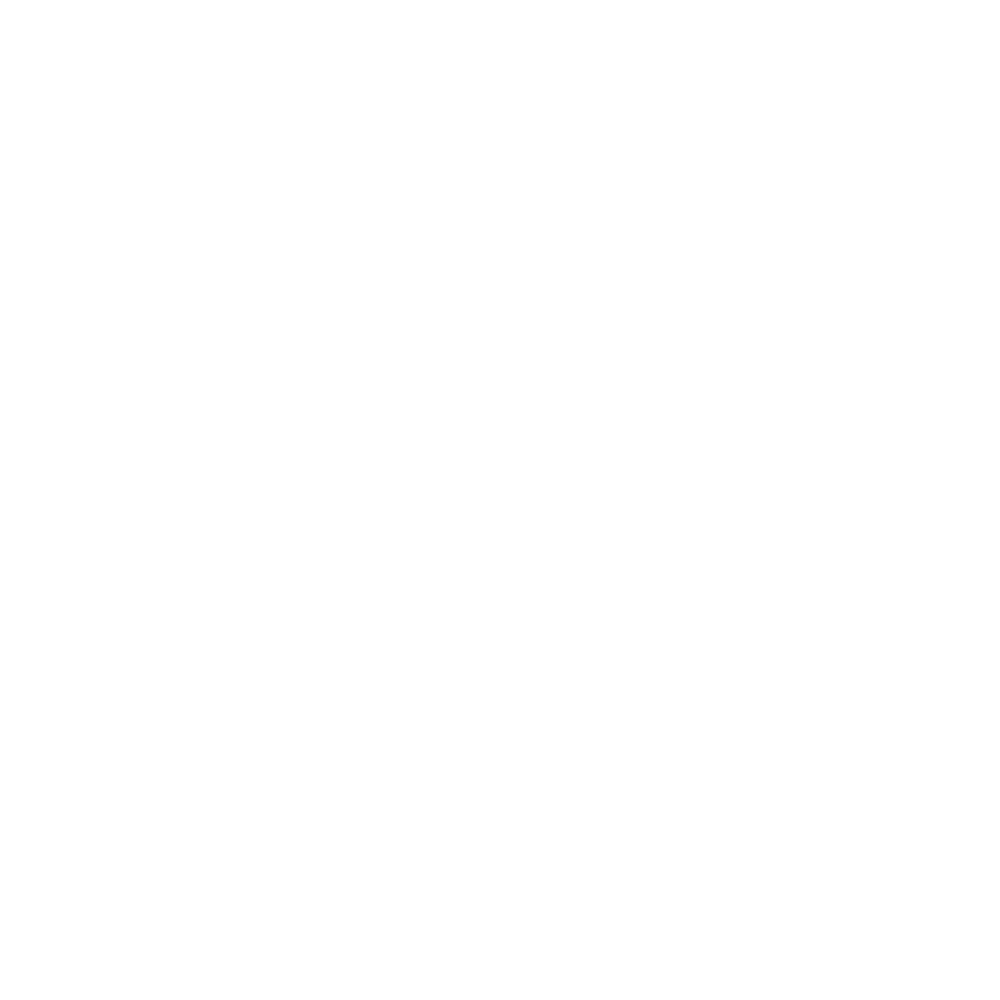

In [32]:

latp = lats[7]
lonp  = lons[7]

plt.figure(figsize=(8,8))

plt.scatter(lonp, latp, c='r', alpha=0.7, s=200)
#plt.legend()
mplleaflet.display()

In [36]:
df[ (df['LONGITUDE']==lonp)].index.tolist()

['ASN00009638',
 'ASN00012131',
 'ASN00012153',
 'ASN00012237',
 'ASN00012245',
 'CHM00050434']

In [16]:
df = pd.read_csv(r'c:\Users\15764\Documents\Datasets\Weather\USC00153223.csv',header=None)

In [144]:
colm = [x for x in range(1,62,2)]

df1 = df[(df[0].str.contains('TMAX')) | df[0].str.contains('TMIN')].set_index(0,drop=True)[colm].reset_index()


df1.columns = [x for x in range(32)]

maxdf = df1[(df1[0].str.contains('TMAX'))].apply(lambda x: x.replace({'0-9999':-9999}),axis=1).copy()
maxdf[0] = maxdf[0].apply(lambda x: x.split('USC00153223')[1].split('TMAX')[0])
maxdf = maxdf.set_index(0,drop=True)
maxs = maxdf[1].astype(float)/ 10
maxs.index.name = 'Date'
maxs.name = 'MAXTEPM'
maxs = maxs[maxs>-200]

<IPython.core.display.Javascript object>


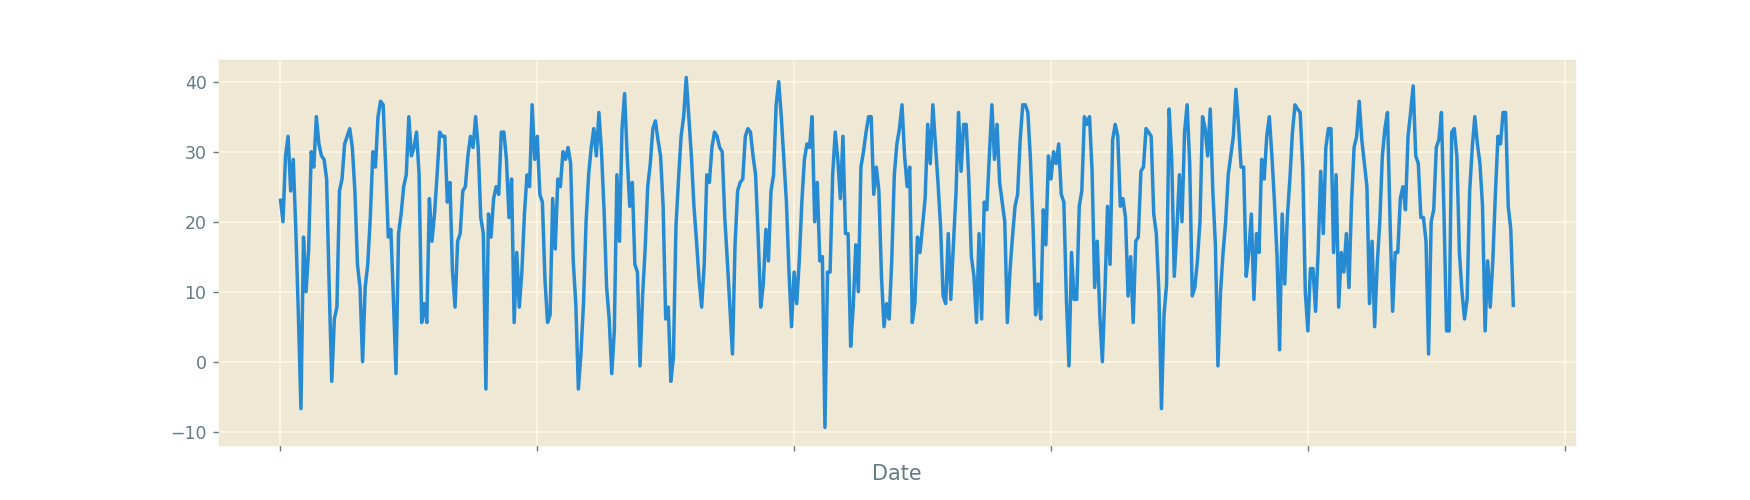

In [152]:
maxs.plot(figsize=(14,4));

In [102]:
import datetime
df['Date']= pd.to_datetime(df["Date"])

In [103]:
df = df.loc[(df['Date']>'2004') & (df['Date']<'2016')]

In [104]:
df = df.sort('Date')

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [105]:
df['Year'] = df.Date.dt.strftime('%Y')
df['Month_Day'] = df.Date.dt.strftime('%m-%d')

In [106]:
df = df[df['Month_Day'] != '02-29']

In [107]:
df.head()

,ID,Date,Element,Data_Value,Year,Month_Day
60995,USW00004848,2005-01-01,TMIN,0,2005,01-01
17153,USC00207320,2005-01-01,TMAX,150,2005,01-01
17155,USC00207320,2005-01-01,TMIN,-11,2005,01-01
10079,USW00014833,2005-01-01,TMIN,-44,2005,01-01
10073,USW00014833,2005-01-01,TMAX,33,2005,01-01


In [108]:
import numpy as np

In [109]:
max_df = (pd.DataFrame(columns=['Month_Day','max_in10y','max_in_2015'])
          .set_index('Month_Day'))

max_df = pd.merge(df[(df['Element']=='TMAX') & (df["Year"]!='2015')].groupby('Month_Day')['Data_Value'].agg({'max_in10y':np.max}),
                 df[(df['Element']=='TMAX') & (df["Year"]=='2015')].groupby('Month_Day')['Data_Value'].agg({'max_in_2015':np.max}),
                 left_index=True, right_index=True)



In [110]:

min_df = (pd.DataFrame(columns=['Month_Day','min_in10y','min_in_2015'])
          .set_index('Month_Day'))

min_df = pd.merge(df[(df['Element']=='TMIN') & (df["Year"]!='2015')].groupby('Month_Day')['Data_Value'].agg({'min_in10y':np.min}),
                 df[(df['Element']=='TMIN') & (df["Year"]=='2015')].groupby('Month_Day')['Data_Value'].agg({'min_in_2015':np.min}),
                 left_index=True, right_index=True)

In [111]:
min_df['break'] = min_df.apply((lambda x: True if x['min_in_2015'] < x['min_in10y'] else False),axis=1)

max_df['break'] = max_df.apply((lambda x: True if x['max_in10y'] < x['max_in_2015'] else False),axis=1)


In [112]:
max_df.reset_index(inplace=True)
min_df.reset_index(inplace=True)

In [113]:
min_df[min_df['break']==True]['min_in_2015'].values #y for scater


array([-155, -200, -238, -239, -260, -294, -272, -260, -343, -322, -267,
       -272, -217, -216, -288, -272, -221, -255, -222, -122, -111, -122,
        -71,  -50,    0,   72,   56,  -55,  -55,  -61,  -39,  -44])

In [114]:
min_df[min_df['break']==True].index.values #x for scatter

array([  4,  10,  33,  44,  45,  46,  47,  49,  50,  51,  53,  54,  55,
        56,  57,  58,  63,  64,  65,  86,  87,  88, 113, 114, 139, 183,
       239, 289, 290, 291, 292, 313])

In [116]:
len(range(15,len(max_df.index.values),30))

12

<IPython.core.display.Javascript object>


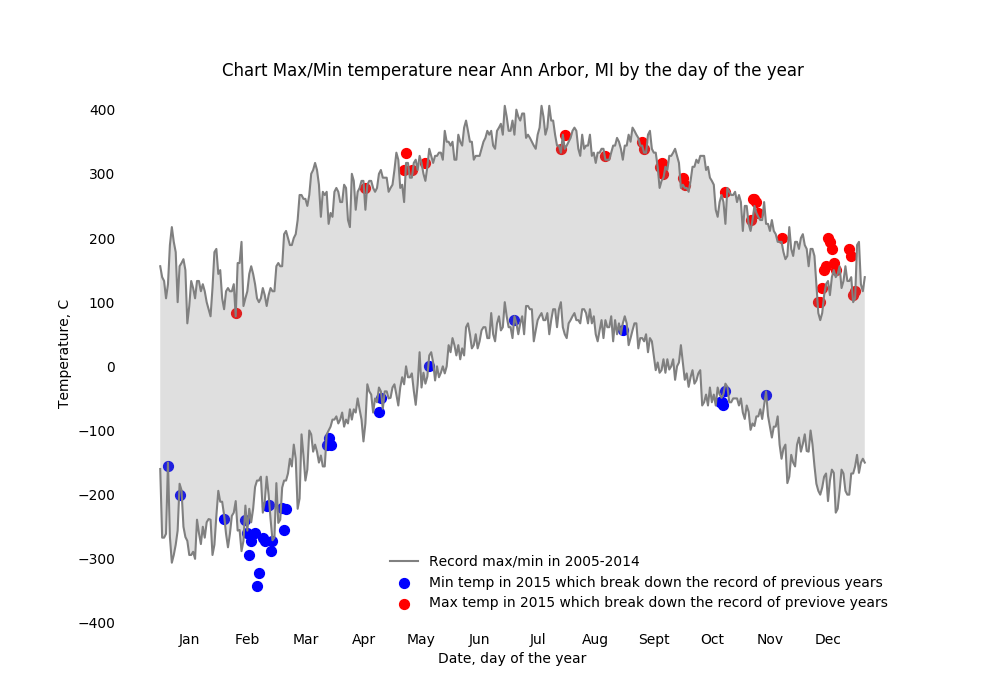

In [123]:
#create axis
fig, ax = plt.subplots(figsize=(10,7))

maxline = ax.plot(max_df.index.values,max_df['max_in10y'].values, color = 'gray', label ='Record max/min in 2005-2014',alpha=1)
minline = ax.plot(min_df.index.values,min_df['min_in10y'].values, color = 'gray',alpha=1)

minbrake = ax.scatter(min_df[min_df['break']==True].index.values ,
                     min_df[min_df['break']==True]['min_in_2015'].values,
                     s=50,
                     color='blue',
                     label='Min temp in 2015 which break down the record of previous years')

maxbrake = ax.scatter(max_df[max_df['break']==True].index.values ,
                     max_df[max_df['break']==True]['max_in_2015'].values,
                     s=50,
                     color='red',
                     label='Max temp in 2015 which break down the record of previove years')

ax.fill_between(max_df.index.values, 
                       max_df['max_in10y'].values, min_df['min_in10y'].values, 
                       facecolor='gray', 
                       alpha=0.25)

plt.legend(frameon=False)
mounth = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.xticks(range(15,len(max_df.index.values),30),mounth)


plt.tick_params(top='off', bottom='off', left='off', right='off', labelright='off', labelbottom='on')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
#ax2 = ax.twinx()

#------------
ax.set_ylim([-400,440])
#ax2.set_ylim([-400,400])

plt.xlabel('Date, day of the year')
plt.ylabel('Temperature, C')
#plt.ylabel('Temperature, C')
#ax.set_ylabel('Temperature, C')
#ax2.set_ylabel('Temperature, C')
plt.title('Chart Max/Min temperature near Ann Arbor, MI by the day of the year')


#------------
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()